# Numerically Solving Schrodinger Equations

<font  face=Times color=darkblue size=3> After showing how to numerically solve the differential equations, we now use the techniques to solve single-particle Schrodinger equations.

## Stationary Schrodinger Equation

### Simple Matrix Method

<font  face=Times color=darkblue size=3>We first consider stationary Schrodinger Equation:$$E\psi(x)=-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}\psi(x)+V(x)\psi(x).$$
<br>Ater discretization, we take $x_i=i\times dx$, $i\in [0,n+1]$, and then:$$E\psi_i=-\frac{\hbar^2}{2m}\frac{\psi_{i+1}+\psi_{i-1}-2\psi_{i}}{dx^2}+V_i\psi_i$$ with boundary condition: $\psi_0=\psi_{n+1}=0$.
<br>Thus, we get n linear equations, and we can write in matrix form.

### The numerov Matrix Algorithm

<font  face=Times color=darkblue size=3> Here we use the numerov matrix method as introduced in the lecture notes, where we have the equation: $$(-\frac{1}{\gamma^2}B^{-1}A+v)\Psi=\epsilon\Psi.$$ In the equation above, $A=\mathbb{I}_{-1}-2\mathbb{I}_0+\mathbb{I}_1$, and $B=\mathbb{I}_{-1}+10\mathbb{I}_0+\mathbb{I}_1$. Besides, $\gamma^2=\frac{2m}{\hbar^2}$. For the diagonal matrix $v$, the diagonal elements are the potential values.

#### 1. Harmonic Oscillator

##### 1.1 Simple Matrix

<font  face=Times color=darkblue size=3>For 1d harmonic oscillator:$$E\psi_i=-\frac{\hbar^2}{2mdx^2}(\psi_{i+1}+\psi_{i-1})+(\frac{\hbar^2}{mdx^2}+\frac{1}{2}mw^2(i-\frac{n}{2})^2dx^2)\psi_i$$
<br>So, the matrix form is:$E'\begin{bmatrix}
\psi_1  \\ \vdots  \\ \psi_n \\\end{bmatrix}
=\begin{bmatrix} \frac{1}{2}\frac{(1-n/2)^2*dx^2}{HbarM}& -\frac{1}{2}HbarM & \cdots\\ 
-\frac{1}{2}HbarM &\ddots&\cdots  \\ 
\vdots &\vdots&\ddots\\
\end{bmatrix}
\begin{bmatrix}
\psi_1  \\ \vdots  \\ \psi_n \\\end{bmatrix}$ with $HbarM=\frac{\hbar}{mwdx}, E'=(E-\frac{\hbar^2}{m dx^2})*dx/(\hbar w)$. <br><br>Since we know the analytical solution is $E/(\hbar w)=(n+1/2)$, we do not need to set the value of $\hbar w$, but rather set $HbarM=1$ and, $dx=0.01, n=200$. Then the equation becomes:$$\frac{E dx}{\hbar w}\begin{bmatrix}
\psi_1  \\ \vdots  \\ \psi_n \\\end{bmatrix}
=(\begin{bmatrix} \frac{1}{2}\frac{(1-n/2)^2*dx^2}{HbarM}& -\frac{1}{2}HbarM & \cdots\\ 
-\frac{1}{2}HbarM &\ddots&\cdots  \\ 
\vdots &\vdots&\ddots\\
\end{bmatrix}+I*HbarM)
\begin{bmatrix}
\psi_1  \\ \vdots  \\ \psi_n \\\end{bmatrix},$$ where $I$ is an identity matrix. So, after diagonalization, the eigenvalues are the energies and the eigenvectors are the wavefunctions.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import animation

In [ ]:
#set parameter
dx=0.1
n=225

In [ ]:
#set the matrix element
the_matrix=np.zeros((n,n))
#row 1:
the_matrix[0,0]=np.power((0-n/2)*dx,2)/2+1
the_matrix[0,1]=-0.5
#row n:
the_matrix[n-1,n-1]=np.power((n-1-n/2)*dx,2)/2+1
the_matrix[n-1,n-2]=-0.5
#other rows
for i in range(1,n-1):
    the_matrix[i,i]=np.power((i-n/2)*dx,2)/2+1
    the_matrix[i,i-1]=-0.5
    the_matrix[i,i+1]=-0.5


In [ ]:
#diagonalization

E_list1,wf_list1=np.linalg.eig(the_matrix)

In [ ]:
idx_sorted1 = np.argsort(E_list1)

In [ ]:
E_list1=E_list1[idx_sorted1]

In [ ]:
wf_list1=wf_list1[:,idx_sorted1]

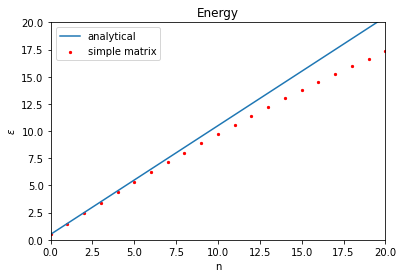

In [ ]:
#Energy plot
n_list=np.arange(0,n)
plt.scatter(n_list,E_list1/dx,s=5,color='red',label='simple matrix')
plt.plot(n_list,n_list+0.5,label='analytical')
plt.xlabel('n')
plt.ylabel(r'$\epsilon$')
plt.title('Energy')
plt.xlim(0,20)
plt.ylim(0,20)
plt.legend()

<font  face=Times color=darkblue size=3>We can see that, at low energy level, the result is acceptable, but at higher levels, the result get worse.

##### 1.2 Numerov Matrix

<font  face=Times color=darkblue size=3> Now we use Numerov Matrix Method for the same situation. Remember that $E$ is of scale $\hbar w$, so we take $E=\hbar w \epsilon$, and the equation can be expressed as: $$-\frac{1}{2}\frac{\partial^2}{\partial x^2}\psi +\frac{1}{2}(\frac{mw}{\hbar})^2x^2\psi=\frac{mw}{\hbar}\epsilon\psi.$$ If we scale $\frac{mw}{\hbar}=1$, and the partial derivative be replaced by the matrix $A$ and $B$, we have $$-\frac{1}{2}B^{-1}A\psi+\frac{1}{2}x^2\psi=\epsilon\psi.$$
If we set the maximum energy $\epsilon_m=50$, then $dx=\frac{1}{\sqrt{2\epsilon_m}}=0.1$ ($\frac{1}{2} x_t^2 = \epsilon_m$, $x_t=10$), and $N=2(4\pi+\frac{x_t}{dx})\approx 225$, where $x_t$ is the maximum position of the oscillator at positive $x$ direction.

In [ ]:
#set parameter
dx=0.1
n=225

In [ ]:
diag_0=np.diag(np.ones(n),0)
diag_p1=np.diag(np.ones(n-1),1)
diag_m1=np.diag(np.ones(n-1),-1)

In [ ]:
mat_A=(1/dx**2)*(diag_m1-2*diag_0+diag_p1)
mat_B=(1/12)*(diag_m1+10*diag_0+diag_p1)

In [ ]:
gamma2=2

In [ ]:
mat_v=np.zeros((n,n))
for i in range(n):
    mat_v[i,i]=0.5*((i-(n)/2)**2)*(dx**2)

In [ ]:
#add v
the_matrix=((-1/gamma2)*np.dot(np.linalg.inv(mat_B),mat_A)+mat_v)

In [ ]:
E_list2,wf_list2=np.linalg.eig(the_matrix)
idx_sorted2 = np.argsort(E_list2)
E_list2=E_list2[idx_sorted2]
wf_list2=wf_list2[:,idx_sorted2]

In [ ]:
import mpl_toolkits.axisartist as axisartist

Text(0.5, 1.0, 'Probability Density')

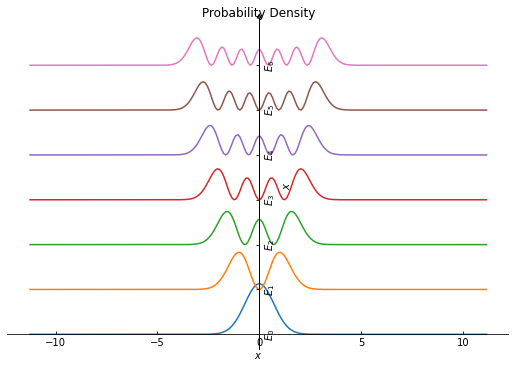

In [ ]:
# Wavefunction plot
n_list=np.arange(0,n)
fig=plt.figure(figsize=(9,6))
ax = axisartist.Subplot(fig, 111) 
#ax = plt.subplot(111)
fig.add_axes(ax)
for i in range(7):
    plt.plot((n_list-n/2)*dx,(wf_list2[:,i])**2*20+1*i,label=str(i))
plt.xlabel(r'$x$')
plt.ylabel(r'$\Psi_n(x)$')
plt.yticks([0,1,2,3,4,5,6],[r'$E_0$',r'$E_1$',r'$E_2$',r'$E_3$',r'$E_4$',r'$E_5$',r'$E_6$'])
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.axis[:].set_visible(False)
ax.axis["y"] = ax.new_floating_axis(1,0)
ax.axis["y"].set_axisline_style("-|>", size = 1.0)
ax.axis["x"] = ax.new_floating_axis(0,0)
plt.title('Probability Density')
#plt.legend()

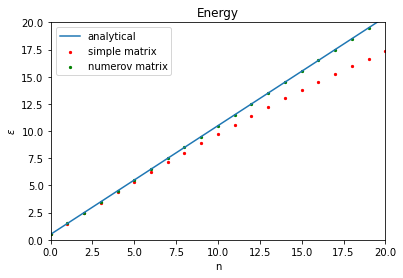

In [ ]:
#Energy plot
plt.scatter(n_list,E_list1/dx,s=5,color='red',label='simple matrix')
plt.scatter(n_list,E_list2,s=5,color='green',label='numerov matrix')
plt.plot(n_list,n_list+0.5,label='analytical')
plt.xlabel('n')
plt.ylabel(r'$\epsilon$')
plt.title('Energy')
plt.xlim(0,20)
plt.ylim(0,20)
plt.legend()

<font  face=Times color=darkblue size=3> Then, we get similar results and we can see the numerov method seems more stable with the same discretization.

#### 2. Square Well

##### Simple Matrix method 

In [4]:
#set parameter
n=1000
dx=0.01

#set the matrix element
the_matrix=np.zeros((n,n))
#row 1:
the_matrix[0,0]=  1.
the_matrix[0,1]=-0.5
#row n:
the_matrix[n-1,n-1]= +1.
the_matrix[n-1,n-2]=-0.5
#other rows

for i in range(1,n-1):
    the_matrix[i,i]= 1.
    the_matrix[i,i-1]= - 0.5
    the_matrix[i,i+1]= -0.5

E_list1,wf_list1=np.linalg.eig(the_matrix)
idx_sorted1 = np.argsort(E_list1)
E_list1=E_list1[idx_sorted1]
wf_list1=wf_list1[:,idx_sorted1]

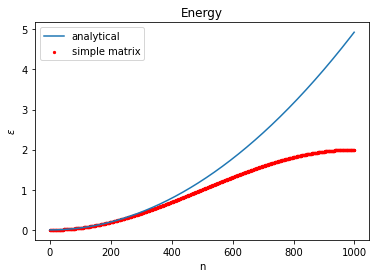

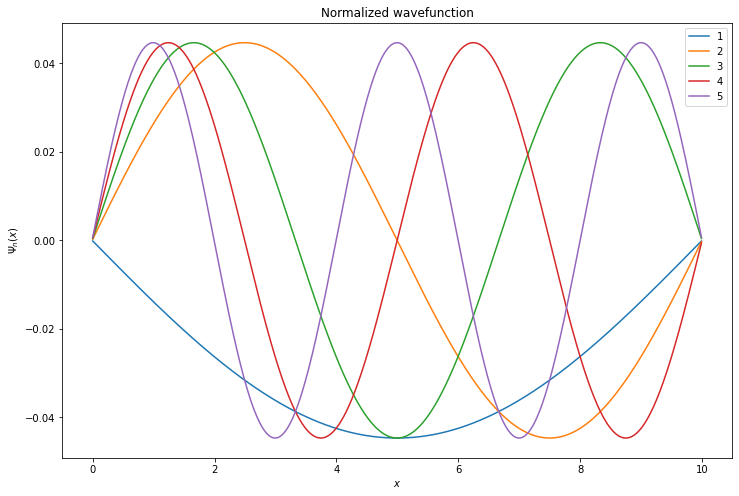

In [6]:
#Energy plot
n_list=np.arange(0,n)
plt.scatter(n_list,E_list1,s=5,color='red',label='simple matrix')
plt.plot(n_list,n_list**2*np.pi**2*0.01**2/(2*10**2),label='analytical')
plt.xlabel('n')
plt.ylabel(r'$\epsilon$')
plt.title('Energy')
#plt.xlim(0,500)
#plt.ylim(0,3)
plt.legend()

plt.figure(figsize=(12,8))
for i in range(5):
    plt.plot((n_list)*dx,(wf_list1[:,i]),label=str(i+1))
plt.xlabel(r'$x$')
plt.ylabel(r'$\Psi_n(x)$')
plt.title('Normalized wavefunction')
plt.legend()

##### Numerov Matrix

<font  face=Times color=darkblue size=3> Then we consider a square well with $V(0)=V(n+1)=\infty$.
    <br><br> Here we set $v$ between the boundaries to be $-1$ and $\gamma^2=1$ for simplicity as it is just a constant term in the equation and we focus on the wavefunctions.

In [ ]:
#set parameter
n=1000
dx=0.01

In [ ]:
diag_0=np.diag(np.ones(n),0)
diag_p1=np.diag(np.ones(n-1),1)
diag_m1=np.diag(np.ones(n-1),-1)

In [ ]:
mat_A=(1/dx**2)*(diag_m1-2*diag_0+diag_p1)
mat_B=(1/12)*(diag_m1+10*diag_0+diag_p1)

In [ ]:
gamma2=1

In [ ]:
the_matrix=((-1/gamma2)*np.dot(np.linalg.inv(mat_B),mat_A)+(-1)*np.diag(np.ones(n)))# add v

In [ ]:
E_list,wf_list=np.linalg.eig(the_matrix)
idx_sorted = np.argsort(E_list)
E_list=E_list[idx_sorted]
wf_list=wf_list[:,idx_sorted]

In [ ]:
n_list=np.arange(1,n+1)

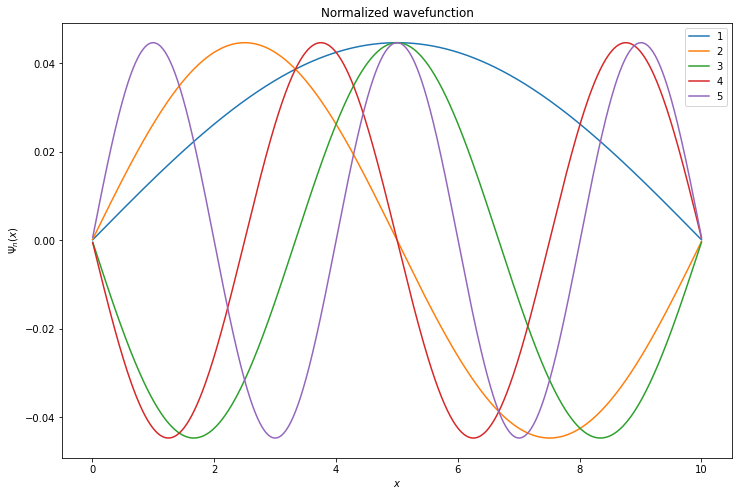

In [ ]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.plot((n_list)*dx,(wf_list[:,i]),label=str(i+1))
plt.xlabel(r'$x$')
plt.ylabel(r'$\Psi_n(x)$')
plt.title('Normalized wavefunction')
plt.legend()

<font  face=Times color=darkblue size=3> The results are exactly the same as what we have learned about anylitical solutions.

## Time-Dependent Schrodinger Equation

### Introduction

<font  face=Times color=darkblue size=3>Next, we consider time-dependent Schrodinger equation:$$i\hbar\frac{\partial}{\partial t}\psi(t,x)=H(x)\psi(t,x)$$
<br><br>Using Crank-Nicolson Scheme, the equation can be written as:$$i\hbar\frac{\psi^{n+1}_r-\psi^{n}_r}{\tau}=\sum_{s=1}^NH_{r,s}\frac{1}{2}(\psi_s^n+\psi_s^{n+1})$$
with $H_{r,s}=-\frac{\hbar^2}{2m}\frac{\delta_{r+1,s}+\delta_{r-1,s}-2\delta_{r,s}}{h^2}+V(x_r)\delta_{r,s}$
<br><br>Further:$$\psi^{n+1}=(1+\frac{i\tau}{2\hbar}H)^{-1}(1-\frac{i\tau}{2\hbar}H)\psi^n$$
<br><br>Initial condition:$\psi(t=0,x)=\frac{1}{\sqrt{\sigma_0\sqrt{2\pi}}}e^{ik_0x}e^{-\frac{1}{2}\frac{(x-x_0)^2}{2\sigma_0^2}}$,
<br>$\hbar=m=1,x_0=-10,L=40,\sigma_0=1,k_0=7,N=401,\tau=0.0002,h=L/N$, and the potential V inside to be 0.

### Code

In [ ]:
#set parameters
hbar=1
m=1
x0=-10
L=40
sigma0=1
k0=7
N=400
tau=0.03
tn=600
h=L/N
x_list=[]
for i in range(N):
    x_list.append(i*h-L/2)

In [ ]:
psi_list=np.zeros((tn,N),dtype=np.complex64)
#set psi_0
for i in range(N):
    psi_list[0,i]=(1/np.sqrt(sigma0*np.sqrt(np.pi)))*np.exp((1j)*k0*(x_list[i]-x0))*np.exp(-0.5*np.power(x_list[i]-x0,2)/(np.power(sigma0,2)))

In [ ]:
sum=0
for i in psi_list[0]:
    sum+=abs(i)**2*h
print('as the sum of possibility is:',sum,'we can say it is normalized')

as the sum of possibility is: 0.9999999825424379 we can say it is normalized


In [ ]:
#build the H matrix
matrix_H=np.zeros((N,N))
#first row
matrix_H[0,0]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[0,1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#last row
matrix_H[N-1,N-1]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[N-1,N-2]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#other rows
for i in range(1,N-1):
    matrix_H[i,i]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
    matrix_H[i,i+1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
    matrix_H[i,i-1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))

In [ ]:
# the new matrix in the formula
mat_1plus_inv=np.linalg.inv(np.identity(N)+((1j*tau)/(2*hbar))*matrix_H)
mat_1minus=np.identity(N)-((1j*tau)/(2*hbar))*matrix_H

In [ ]:
for i in range(1,tn):
    psi_list[i]=np.dot(np.dot(mat_1plus_inv,mat_1minus),psi_list[i-1].reshape(N,1)).reshape(N,)

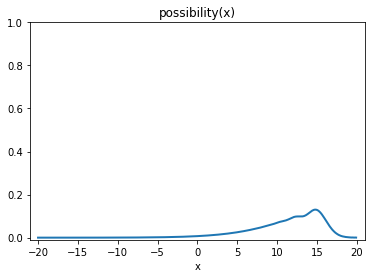

In [ ]:
fig1, ax1 = plt.subplots()
line1, = ax1.plot([], [], lw=2)
plt.xlim(-21,21)
plt.ylim(-0.01,1.0)
ax1.set_xlabel('x')
ax1.set_title('possibility(x)')
def animate1(i):
    xx=x_list
    yy=abs(psi_list[i*4])**2
    line1.set_data(xx, yy)
    return (line1,)
anim1 = animation.FuncAnimation(fig1, animate1, frames=150, interval=100, blit=True)
rc('animation', html='jshtml')
anim1

<font  face=Times color=darkblue size=3>Using similar scheme, by adding some potential or change boundary and initial conditions, you can easily check the solution of Schroedinger Equation in other cases.
<br> For example, take the conditions above unchanged, except that we add rectangular potential barrier of $V=k_0^2/2$ at $-2<x<2$.

In [ ]:
#set parameters
hbar=1
m=1
x0=-10
L=40
sigma0=1
k0=7
N=400
tau=0.03
tn=600
h=L/N
x_list=[]
for i in range(N):
    x_list.append(i*h-L/2)

In [ ]:
psi_list=np.zeros((tn,N),dtype=np.complex64)
#set psi_0
for i in range(N):
    psi_list[0,i]=(1/np.sqrt(sigma0*np.sqrt(np.pi)))*np.exp((1j)*k0*(x_list[i]-x0))*np.exp(-0.5*np.power(x_list[i]-x0,2)/(np.power(sigma0,2)))

In [ ]:
#build the H matrix (add V)
matrix_H=np.zeros((N,N))
#first row
matrix_H[0,0]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[0,1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#last row
matrix_H[N-1,N-1]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[N-1,N-2]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#other rows
for i in range(1,N-1):
    matrix_H[i,i]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
    matrix_H[i,i+1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
    matrix_H[i,i-1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
    if 180<i<220:
        matrix_H[i,i]+=k0**2/2

In [ ]:
# the new matrix in the formula
mat_1plus_inv=np.linalg.inv(np.identity(N)+((1j*tau)/(2*hbar))*matrix_H)
mat_1minus=np.identity(N)-((1j*tau)/(2*hbar))*matrix_H

In [ ]:
for i in range(1,tn):
    psi_list[i]=np.dot(np.dot(mat_1plus_inv,mat_1minus),psi_list[i-1].reshape(N,1)).reshape(N,)

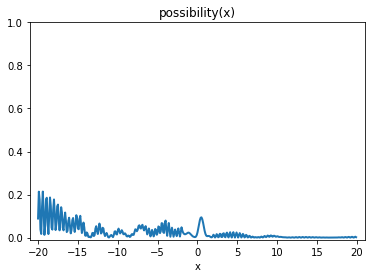

In [ ]:
fig2, ax2 = plt.subplots()
line2, = ax2.plot([], [], lw=2)
plt.xlim(-21,21)
plt.ylim(-0.01,1.0)
ax2.set_xlabel('x')
ax2.set_title('possibility(x)')
def animate2(i):
    xx=x_list
    yy=abs(psi_list[i*4])**2
    line2.set_data(xx, yy)
    return (line2,)
anim2 = animation.FuncAnimation(fig2, animate2, frames=150, interval=150, blit=True)
rc('animation', html='jshtml')
anim2

<font  face=Times color=darkblue size=3>Now, you could easily see the difference of propogation.